<a href="https://colab.research.google.com/github/Thangleee/DetectAttackDDoS/blob/main/TestAtk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import joblib, pandas as pd, numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt, seaborn as sns

In [46]:
rf_model     = joblib.load("/content/drive/MyDrive/DA/data_rf_model.pkl")
scaler       = joblib.load("/content/drive/MyDrive/DA/scaler.pkl")
feature_list = joblib.load("/content/drive/MyDrive/DA/feature_list.pkl")

In [47]:
df_test = pd.read_csv("/content/drive/MyDrive/DA/data/my_test_datasets.csv")


In [48]:
drop_cols = ["Flow ID", "Src IP", "Dst IP", "Timestamp"]
df_test = df_test.drop(columns=drop_cols, errors="ignore")

In [49]:
df_test["label"] = df_test["Label"].apply(lambda x: 1 if x == "DDoS" else 0)

In [50]:
X_real = df_test.drop(columns=["Flow ID", "Src IP", "Dst IP", "Timestamp", "Label"], errors="ignore")
y_real = (df_test["Label"] == "DDoS").astype(int)

In [51]:
for col in feature_list:
    if col not in df_test.columns:
        df_test[col] = 0
X_real = df_test[feature_list]
y_real = df_test["label"]

In [52]:
label_counts = df_test["Label"].value_counts()
print("Số lượng nhãn trong cột 'label':")
print(label_counts)

Số lượng nhãn trong cột 'label':
Label
BENIGN    72204
DDoS      65229
Name: count, dtype: int64


In [53]:
mask_good = np.isfinite(X_real).all(axis=1)
X_real, y_real = X_real[mask_good], y_real[mask_good]

In [54]:
X_real_scaled = scaler.transform(X_real)
y_pred = rf_model.predict(X_real_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

      BENIGN       1.00      0.00      0.00     72203
        DDoS       0.48      1.00      0.64     65229

    accuracy                           0.48    137432
   macro avg       0.74      0.50      0.32    137432
weighted avg       0.75      0.48      0.31    137432



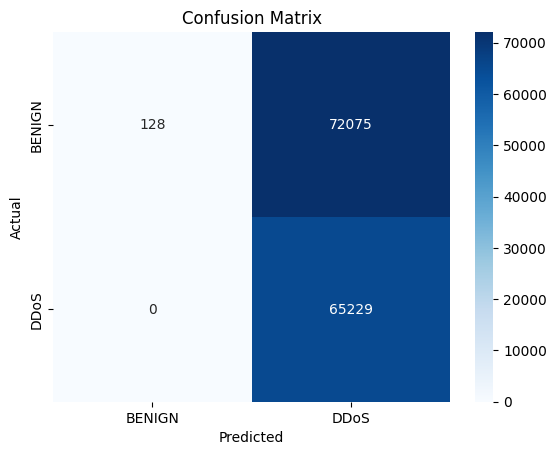

In [55]:
print(classification_report(y_real, y_pred, target_names=["BENIGN","DDoS"]))

cm = confusion_matrix(y_real, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["BENIGN","DDoS"], yticklabels=["BENIGN","DDoS"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix"); plt.show()